# Example of how to filter spectra based on an RT window

In [12]:
import os
import glycoproteomics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
from pprint import pprint
matplotlib_inline.backend_inline.set_matplotlib_formats("png")
figure_size = (8, 4)
dpi = 100

reference_spectrum_filepath = "/Users/jonesm5/Dropbox (The Francis Crick)/PlasmaPooled_diann/20210702_Kuebler_2_P2_B1_PlasmaPooled_1.wiff.dia.extracted.txt"

In [13]:
ref_spectrum = glycoproteomics.io.read_spectrum_file(reference_spectrum_filepath)
ref_ions = glycoproteomics.spectrum.list_ions(ref_spectrum)
print(reference_spectrum_filepath)
print(ref_ions)

/Users/jonesm5/Dropbox (The Francis Crick)/PlasmaPooled_diann/20210702_Kuebler_2_P2_B1_PlasmaPooled_1.wiff.dia.extracted.txt
['138.055', '145.05', '163.06', '186.076', '204.087', '274.092', '292.103', '366.14', '512.197', '657.235', '803.293']


Bin the spectra to make them easier to work with and merge

In [14]:
rt_x_bin_size = 0.06
mz_y_bin_size = 2.0

binned_ref_spectrum = glycoproteomics.spectrum.bin(
    ref_spectrum,
    rt_x_bin_size,
    mz_y_bin_size,
    np.mean
)
del(ref_spectrum)


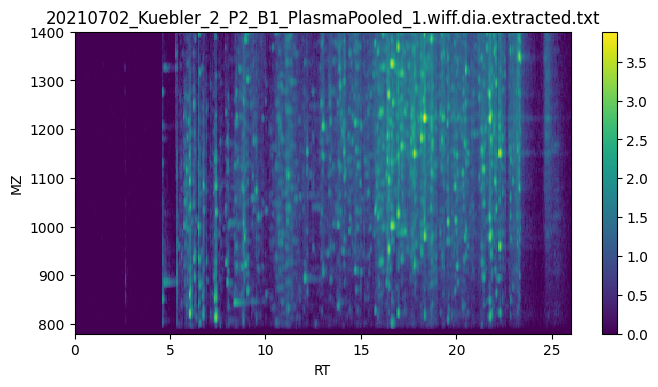

In [15]:
merged_ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(
    binned_ref_spectrum,
    ref_ions
)
glycoproteomics.plotting.plot_ion_matrix(
    merged_ion_matrix,
    x_label,
    y_label,
    reference_spectrum_filepath.split("/")[-1],
    figure_size,
    dpi
)
plt.show()

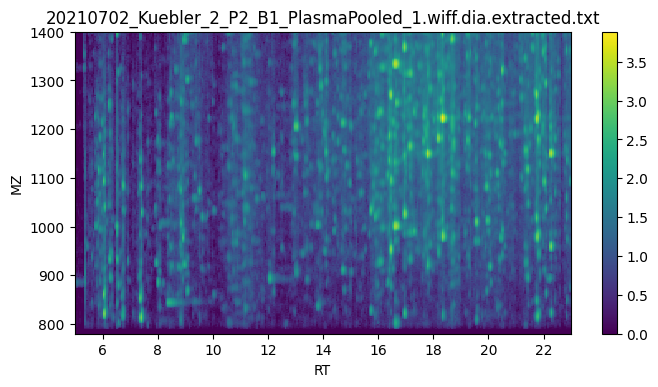

In [16]:
min_rt = 5.0
max_rt = 23.0

filtered_binned_ref_spectrum = glycoproteomics.spectrum.filter_rt(
    binned_ref_spectrum,
    min_rt,
    max_rt
)

merged_ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(
    filtered_binned_ref_spectrum,
    ref_ions
)
glycoproteomics.plotting.plot_ion_matrix(
    merged_ion_matrix,
    x_label,
    y_label,
    reference_spectrum_filepath.split("/")[-1],
    figure_size,
    dpi
)
plt.show()